## the churn prediction dataset, which contains raw data of 28,382 customers. The dataset includes the following columns:

customer_id: Unique identifier for each customer. 

vintage: The duration of the customer's relationship with the company.

age: Age of the customer.

gender: Gender of the customer.

dependents: Number of dependents the customer has.

occupation: The occupation of the customer.

city: City in which the customer is located.

customer_nw_category: Net worth category of the customer.

branch_code: Code identifying the branch associated with the customer.

current_balance: Current balance in the customer's account.

previous_month_end_balance: Account balance at the end of the previous month.

average_monthly_balance_prevQ: Average monthly balance in the previous quarter.

average_monthly_balance_prevQ2: Average monthly balance in the second previous quarter.

current_month_credit: Credit amount in the current month.

previous_month_credit: Credit amount in the previous month.

current_month_debit: Debit amount in the current month.

previous_month_debit: Debit amount in the previous month.

current_month_balance: Account balance in the current month.

previous_month_balance: Account balance in the previous month.

churn: The target variable indicating whether the customer has churned (1 for churned, 0 for not churned).

last_transaction: Timestamp of the customer's last transaction.

This dataset provides a comprehensive view of various attributes related to the customers' banking activities. With these features, it becomes possible to build predictive models to identify potential churners based on historical and current customer behavior. The dataset's size allows for robust analysis and modeling to improve customer retention strategies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
df=pd.read_csv('churn_prediction.csv')

In [3]:
df

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT


In [4]:
df.shape

(28382, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [6]:
df[df.duplicated()]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction


In [7]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

In [8]:
for i in df.columns:
    print('col:',i,df[i].unique())
    print('\n')

col: customer_id [    1     2     4 ... 30299 30300 30301]


col: vintage [2101 2348 2194 ... 1007  845 1333]


col: age [66 35 31 90 42 72 46 40 68 32 73 50 48 51 49 52 47 41 45 29 34 76 36 56
 55 33 64 54  9 69 44 17  4 30 43 65 19 13 67 60 79 21 57 27 71 61 70 26
 58 63 53 74 75 39 38 62 10 37  3 25 28 83 23 59 77 81 18 15 24  6 22 80
 84 20 14 86 78  7 11  8 82 88 85 89  5 16 87  2 12  1]


col: gender ['Male' nan 'Female']


col: dependents [ 0. nan  2.  3.  1.  7.  4.  6.  5.  9. 52. 36. 50.  8. 25. 32.]


col: occupation ['self_employed' 'salaried' 'retired' 'student' nan 'company']


col: city [ 187.   nan  146. ...  556. 1167.  723.]


col: customer_nw_category [2 3 1]


col: branch_code [ 755 3214   41 ... 3005 3133 4104]


col: current_balance [ 1458.71  5390.37  3913.16 ...  3844.1  65511.97  2107.05]


col: previous_month_end_balance [ 1458.71  8704.66  5815.29 ...  4069.21 61017.55  2821.34]


col: average_monthly_balance_prevQ [ 1458.71  7799.26  4910.17 ...  3668.83 534

In [9]:
df.churn.value_counts()

churn
0    23122
1     5260
Name: count, dtype: int64

## last_transaction

In [10]:
date=pd.DatetimeIndex(df.last_transaction)

In [11]:
df['doy_ls_trans']=date.dayofyear
df['moy_ls_trans']=date.month
df['dow_ls_trans']=date.dayofweek


In [12]:
# Example for extracting day of the week from a date feature
df['dow_ls_trans'] = pd.to_datetime(df['dow_ls_trans'], errors='coerce').dt.dayofweek


In [13]:
df.drop('last_transaction',axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

## Feature Engineering

In [15]:
# Example for creating a feature representing the change in balance
df['balance_change'] = df['current_balance'] - df['previous_month_end_balance']
# Example for creating an interaction feature
df['age_times_balance'] = df['age'] * df['current_balance']
# Example for creating age bins
df['age_bin'] = pd.cut(df['age'], bins=[0, 25, 40, 60, np.inf], labels=['0-25', '25-40', '40-60', '60+'])


In [16]:
df

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,previous_month_debit,current_month_balance,previous_month_balance,churn,doy_ls_trans,moy_ls_trans,dow_ls_trans,balance_change,age_times_balance,age_bin
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,0.20,1458.71,1458.71,0,141.0,5.0,3.0,0.00,96274.86,60+
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,100.56,6496.78,8787.61,0,305.0,11.0,3.0,-3314.29,188662.95,25-40
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,259.23,5006.28,5070.14,0,NaN,NaN,NaN,-1902.13,121307.96,25-40
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2143.33,2291.91,1669.79,1,218.0,8.0,3.0,0.00,206271.90,60+
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1538.06,1157.15,1677.16,1,307.0,11.0,3.0,-474.00,38964.24,40-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,0.30,1076.43,1076.43,0,295.0,10.0,3.0,0.00,10764.30,0-25
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,1014.07,3738.54,3690.32,0,351.0,12.0,3.0,-225.11,130699.40,25-40
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,71.80,61078.50,57564.24,1,365.0,12.0,3.0,4494.42,3079062.59,40-60
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,0.20,1625.55,1625.55,0,NaN,NaN,NaN,0.00,81277.50,40-60


In [17]:
df

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,previous_month_debit,current_month_balance,previous_month_balance,churn,doy_ls_trans,moy_ls_trans,dow_ls_trans,balance_change,age_times_balance,age_bin
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,0.20,1458.71,1458.71,0,141.0,5.0,3.0,0.00,96274.86,60+
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,100.56,6496.78,8787.61,0,305.0,11.0,3.0,-3314.29,188662.95,25-40
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,259.23,5006.28,5070.14,0,NaN,NaN,NaN,-1902.13,121307.96,25-40
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2143.33,2291.91,1669.79,1,218.0,8.0,3.0,0.00,206271.90,60+
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1538.06,1157.15,1677.16,1,307.0,11.0,3.0,-474.00,38964.24,40-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,0.30,1076.43,1076.43,0,295.0,10.0,3.0,0.00,10764.30,0-25
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,1014.07,3738.54,3690.32,0,351.0,12.0,3.0,-225.11,130699.40,25-40
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,71.80,61078.50,57564.24,1,365.0,12.0,3.0,4494.42,3079062.59,40-60
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,0.20,1625.55,1625.55,0,NaN,NaN,NaN,0.00,81277.50,40-60


In [17]:
df_encoded=pd.get_dummies(df,drop_first=True)

In [18]:
df_encoded.astype('float')

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,...,balance_change,age_times_balance,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,age_bin_25-40,age_bin_40-60,age_bin_60+
0,1.0,2101.0,66.0,0.0,187.0,2.0,755.0,1458.71,1458.71,1458.71,...,0.00,96274.86,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2.0,2348.0,35.0,0.0,NaN,2.0,3214.0,5390.37,8704.66,7799.26,...,-3314.29,188662.95,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,4.0,2194.0,31.0,0.0,146.0,2.0,41.0,3913.16,5815.29,4910.17,...,-1902.13,121307.96,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,5.0,2329.0,90.0,NaN,1020.0,2.0,582.0,2291.91,2291.91,2084.54,...,0.00,206271.90,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,6.0,1579.0,42.0,2.0,1494.0,3.0,388.0,927.72,1401.72,1643.31,...,-474.00,38964.24,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297.0,2325.0,10.0,0.0,1020.0,2.0,1207.0,1076.43,1076.43,2282.19,...,0.00,10764.30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28378,30298.0,1537.0,34.0,0.0,1046.0,2.0,223.0,3844.10,4069.21,3668.83,...,-225.11,130699.40,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
28379,30299.0,2376.0,47.0,0.0,1096.0,2.0,588.0,65511.97,61017.55,53444.81,...,4494.42,3079062.59,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
28380,30300.0,1745.0,50.0,3.0,1219.0,3.0,274.0,1625.55,1625.55,1683.20,...,0.00,81277.50,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [20]:
imputer=IterativeImputer(max_iter=200,random_state=0)
imputed_data=imputer.fit_transform(df_encoded)

In [21]:
df1 = pd.DataFrame(imputed_data, columns=df_encoded.columns)

In [22]:
df1

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,...,balance_change,age_times_balance,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,age_bin_25-40,age_bin_40-60,age_bin_60+
0,1.0,2101.0,66.0,0.000000,187.000000,2.0,755.0,1458.71,1458.71,1458.71,...,0.00,96274.86,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2.0,2348.0,35.0,0.000000,738.832357,2.0,3214.0,5390.37,8704.66,7799.26,...,-3314.29,188662.95,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,4.0,2194.0,31.0,0.000000,146.000000,2.0,41.0,3913.16,5815.29,4910.17,...,-1902.13,121307.96,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,5.0,2329.0,90.0,0.000885,1020.000000,2.0,582.0,2291.91,2291.91,2084.54,...,0.00,206271.90,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,6.0,1579.0,42.0,2.000000,1494.000000,3.0,388.0,927.72,1401.72,1643.31,...,-474.00,38964.24,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297.0,2325.0,10.0,0.000000,1020.000000,2.0,1207.0,1076.43,1076.43,2282.19,...,0.00,10764.30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28378,30298.0,1537.0,34.0,0.000000,1046.000000,2.0,223.0,3844.10,4069.21,3668.83,...,-225.11,130699.40,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
28379,30299.0,2376.0,47.0,0.000000,1096.000000,2.0,588.0,65511.97,61017.55,53444.81,...,4494.42,3079062.59,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
28380,30300.0,1745.0,50.0,3.000000,1219.000000,3.0,274.0,1625.55,1625.55,1683.20,...,0.00,81277.50,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [23]:
df1.drop('customer_id',axis=True,inplace=True)

### Splitting into train and test

In [24]:
x = df1.drop(['churn'], axis=1)
y = df1['churn']
x.shape, y.shape

((28382, 29), (28382,))

In [25]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 42)

In [26]:
print(train_x.shape,train_y.shape)

(21286, 29) (21286,)


In [27]:
from imblearn.combine import SMOTEENN
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.datasets import make_classification


### Balencing Data using SMOTE

In [28]:
smote = SMOTE(random_state=42)
train_x, train_y = smote.fit_resample(train_x,train_y)

In [29]:
train_x.shape

(34594, 29)

In [30]:
train_y.value_counts()

churn
1.0    17297
0.0    17297
Name: count, dtype: int64

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
cols = train_x.columns
cols

Index(['vintage', 'age', 'dependents', 'city', 'customer_nw_category',
       'branch_code', 'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'doy_ls_trans', 'moy_ls_trans',
       'dow_ls_trans', 'balance_change', 'age_times_balance', 'gender_Male',
       'occupation_retired', 'occupation_salaried', 'occupation_self_employed',
       'occupation_student', 'age_bin_25-40', 'age_bin_40-60', 'age_bin_60+'],
      dtype='object')

In [33]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled

,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,...,balance_change,age_times_balance,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,age_bin_25-40,age_bin_40-60,age_bin_60+
0,-0.075281,-1.320027,-0.357970,2.007856,-0.380389,2.321765,0.033496,0.010319,-0.066364,-0.153176,...,0.059873,-0.045233,0.890766,-0.280470,-0.593927,0.820647,-0.279937,1.591769,-0.845047,-0.591095
1,-0.012481,-0.719300,-0.357970,1.740429,-1.984679,-0.986949,-0.166730,-0.185760,-0.159542,-0.120122,...,0.046124,-0.106254,-1.281367,-0.280470,-0.593927,0.820647,-0.279937,1.591769,-0.845047,-0.591095
2,0.988397,-1.199882,-0.357970,-1.841092,1.223900,0.719865,-0.027413,-0.052578,-0.059116,-0.043298,...,0.064012,-0.060539,0.890766,-0.280470,-0.593927,0.820647,-0.279937,1.591769,-0.845047,-0.591095
3,0.662621,-1.259954,-0.357970,-1.433704,-0.380389,-0.907982,-0.084152,-0.126582,-0.129855,-0.100135,...,0.107337,-0.080204,-1.281367,-0.280470,-0.593927,-1.390254,3.961446,1.591769,-0.845047,-0.591095
4,0.733271,-0.118574,1.582235,1.475501,-1.984679,-0.971155,-0.130484,-0.168088,-0.130695,-0.103422,...,0.094252,-0.086472,0.890766,-0.280470,1.922034,-1.390254,-0.279937,-0.708941,1.349589,-0.591095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34589,0.369000,0.751239,-0.357970,0.577159,1.043100,-0.436987,-0.086829,-0.103957,-0.110266,-0.136293,...,0.042503,-0.049586,0.645971,0.204165,-0.593927,0.571484,-0.279937,-0.708941,1.102258,-0.311400
34590,-0.029061,-0.214346,-0.357970,-0.532756,0.282003,-0.814535,-0.149885,-0.085898,-0.151489,-0.153407,...,-0.166193,-0.099520,0.890766,-0.280470,0.883224,-0.477399,-0.279937,-0.708941,-0.845047,0.433615
34591,0.791050,0.264432,-0.357970,-0.070025,1.223900,-0.115174,-0.027556,-0.084491,0.086567,-0.117387,...,0.145361,-0.020560,0.890766,-0.280470,1.056725,-0.629863,-0.279937,-0.708941,1.349589,-0.591095
34592,0.085772,-2.549653,-0.357970,0.116008,0.431707,-0.815761,-0.166193,-0.190302,-0.050550,-0.019682,...,0.059138,-0.106718,-1.281367,-0.280470,-0.593927,-1.390254,3.961446,-0.708941,-0.845047,-0.591095


In [34]:
test_x_scaled = scaler.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=cols)
test_x_scaled

,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,...,balance_change,age_times_balance,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,age_bin_25-40,age_bin_40-60,age_bin_60+
0,1.267073,0.301935,2.552338,-1.628650,-0.380389,2.142397,-0.165558,-0.150208,-0.150795,-0.099055,...,-0.041896,-0.105216,-1.281367,-0.280470,-0.593927,0.820647,-0.279937,-0.708941,1.349589,-0.591095
1,-2.595137,-1.079736,-0.282166,-1.158779,-0.380389,-0.216457,-0.166254,-0.192266,-0.158586,-0.103112,...,0.064012,-0.106194,-1.281367,-0.280470,1.922034,-1.390254,-0.279937,1.591769,-0.845047,-0.591095
2,1.196423,-0.959591,-0.357970,0.455780,-0.380389,-0.323627,-0.129771,-0.143965,-0.152828,-0.147709,...,0.034316,-0.092422,-1.281367,-0.280470,1.922034,-1.390254,-0.279937,1.591769,-0.845047,-0.591095
3,1.000172,1.142951,-0.357970,-0.329006,-0.380389,-0.255941,-0.089579,-0.114940,-0.122598,-0.048207,...,0.063543,-0.044924,0.890766,4.019837,-0.593927,-1.390254,-0.279937,-0.708941,-0.845047,1.890716
4,-1.872935,-0.178647,-0.357970,0.745701,-0.380389,-0.010015,-0.005628,-0.012596,0.018542,0.038557,...,0.017755,-0.020863,0.890766,-0.280470,-0.593927,0.820647,-0.279937,-0.708941,1.349589,-0.591095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7091,0.533096,1.743678,-0.357970,-0.451472,-0.380389,-0.804197,0.497673,0.564277,0.513777,0.497289,...,-0.162774,0.495924,0.890766,-0.280470,-0.593927,0.820647,-0.279937,-0.708941,-0.845047,1.890716
7092,0.866722,0.001571,-0.357970,0.880664,1.223900,0.511166,-0.113016,-0.138703,-0.143590,-0.112622,...,0.064012,-0.075726,0.890766,-0.280470,1.922034,-1.390254,-0.279937,-0.708941,1.349589,-0.591095
7093,-0.487407,-0.298792,-0.357970,0.715709,-0.380389,-0.289784,-0.134289,-0.159280,-0.158852,-0.093083,...,0.061893,-0.089728,-1.281367,-0.280470,-0.593927,0.820647,-0.279937,-0.708941,1.349589,-0.591095
7094,0.081720,-0.358865,-0.357970,-0.131560,-0.380389,-0.726358,-0.080016,-0.116304,-0.150975,-0.124690,...,0.091672,-0.063329,0.890766,-0.280470,-0.593927,0.820647,-0.279937,-0.708941,1.349589,-0.591095


In [35]:
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import accuracy_score
logreg = LogReg()
logreg.fit(train_x_scaled, train_y)
train_predict = logreg.predict(train_x)
train_predict
k = accuracy_score(train_predict, train_y)
print('Training accuracy_score', k )
test_predict = logreg.predict(test_x)
k = accuracy_score(test_predict, test_y)
print('Test accuracy_score    ', k )

Training accuracy_score 0.4981499682025785
Test accuracy_score     0.177423900789177


In [36]:
train_x

,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,...,balance_change,age_times_balance,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,age_bin_25-40,age_bin_40-60,age_bin_60+
0,2071.000000,26.000000,0.0,1601.000000,2.000000,3000.000000,7712.840000,7774.250000,5103.680000,186.260000,...,-61.410000,200533.840000,1.000000,0.000000,0.000000,1.000000,0.0,1.0,0.000000,0.000000
1,2087.000000,36.000000,0.0,1494.000000,1.000000,67.000000,58.770000,324.180000,1494.130000,1745.030000,...,-265.410000,2115.720000,0.000000,0.000000,0.000000,1.000000,0.0,1.0,0.000000,0.000000
2,2342.000000,28.000000,0.0,61.000000,3.000000,1580.000000,5384.450000,5384.450000,5384.450000,5367.930000,...,0.000000,150764.600000,1.000000,0.000000,0.000000,1.000000,0.0,1.0,0.000000,0.000000
3,2259.000000,27.000000,0.0,224.000000,2.000000,137.000000,3215.510000,2572.660000,2644.160000,2687.600000,...,642.850000,86818.770000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,0.000000
4,2277.000000,46.000000,2.0,1388.000000,1.000000,81.000000,1444.350000,995.650000,2611.610000,2532.560000,...,448.700000,66440.100000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34589,2184.192182,60.479354,0.0,1028.565040,2.887302,554.512241,3113.165623,3432.308023,3403.009234,982.420680,...,-319.142400,186379.872325,0.887302,0.112698,0.000000,0.887302,0.0,0.0,0.887302,0.112698
34590,2082.775637,44.405737,0.0,584.477413,2.412888,219.835367,702.721209,4118.448335,1806.083893,175.368529,...,-3415.727126,24009.958817,1.000000,0.000000,0.587112,0.412888,0.0,0.0,0.000000,0.412888
34591,2291.720655,52.375711,0.0,769.620637,3.000000,839.782488,5378.980894,4171.931408,11027.933857,1873.988641,...,1207.049487,280761.083119,1.000000,0.000000,0.656072,0.343928,0.0,0.0,1.000000,0.000000
34592,2112.032332,5.531015,0.0,844.053933,2.506203,218.749245,79.285643,151.596742,5716.292035,6481.613683,...,-72.311098,605.891819,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000


In [37]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0).fit(train_x, train_y)
train_predict=tree.predict(train_x)
k = accuracy_score(train_predict, train_y)
print('Training accuracy_score', k )
test_predict = tree.predict(test_x)
k = accuracy_score(test_predict, test_y)
print('Test accuracy_score    ', k )

Training accuracy_score 1.0
Test accuracy_score     0.7738162344983089


In [38]:
test_x.shape

(7096, 29)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [40]:
clf = RandomForestClassifier(max_depth=5, random_state=42)
clf.fit(train_x, train_y)
train_predict=clf.predict(train_x)
k = accuracy_score(train_predict, train_y)
print('Training accuracy_score', k )
test_predict = clf.predict(test_x)
k = accuracy_score(test_predict, test_y)
print('Test accuracy_score    ', k )

Training accuracy_score 0.8460137596114933
Test accuracy_score     0.8303269447576099


### CROSS VALIDATION

In [41]:
scoring_metric = make_scorer(accuracy_score)

In [42]:
cv_scores = cross_val_score(clf,train_x,train_y, cv=5, scoring=scoring_metric)

In [43]:
cv_scores.mean()

0.8330357963233836

In [44]:
importances = clf.feature_importances_

In [45]:
importances 

array([0.00057683, 0.00566549, 0.02076724, 0.00070921, 0.01555955,
       0.00218472, 0.19455227, 0.01411954, 0.00895971, 0.00274571,
       0.01217712, 0.00934261, 0.10939871, 0.06009067, 0.04083775,
       0.00520585, 0.01440365, 0.03108778, 0.        , 0.09762193,
       0.13695544, 0.02992375, 0.00456175, 0.04439423, 0.080053  ,
       0.00529758, 0.01043272, 0.0308791 , 0.01149607])

Feature Importances:
vintage: 0.0005768303595838542
age: 0.005665493416052377
dependents: 0.020767241896579258
city: 0.0007092088491594934
customer_nw_category: 0.015559545807841272
branch_code: 0.0021847205065164623
current_balance: 0.19455227195388997
previous_month_end_balance: 0.014119543906810646
average_monthly_balance_prevQ: 0.008959711800073702
average_monthly_balance_prevQ2: 0.0027457106269844324
current_month_credit: 0.01217711857313076
previous_month_credit: 0.009342614872194972
current_month_debit: 0.10939871483604366
previous_month_debit: 0.060090668692651956
current_month_balance: 0.040837749655763485
previous_month_balance: 0.005205849809568777
doy_ls_trans: 0.014403649849081704
moy_ls_trans: 0.031087777037428183
dow_ls_trans: 0.0
balance_change: 0.09762193252389322
age_times_balance: 0.13695543956238243
gender_Male: 0.0299237526282589
occupation_retired: 0.004561749034750758
occupation_salaried: 0.04439422919388154
occupation_self_employed: 0.0800529962884354
occupation

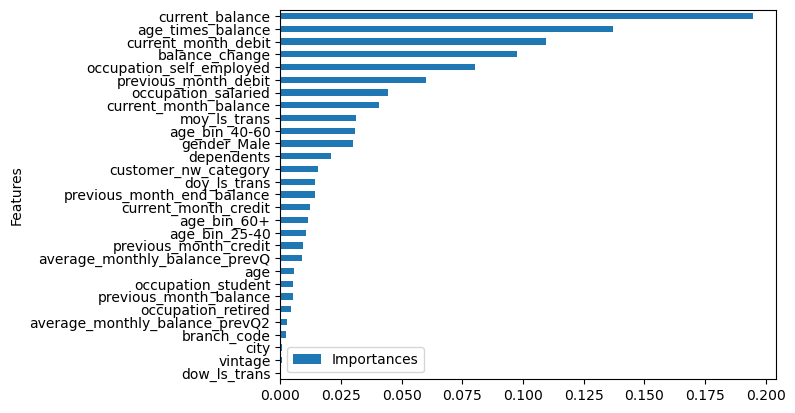

In [46]:
feature_names = train_x.columns

# Print the feature importances
print("Feature Importances:")
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance}")

# Creating a dataframe for visualization
final_df = pd.DataFrame({'Features':feature_names,"Importances":importances})
final_df.set_index('Features',inplace=True)
sorted_importances = final_df.sort_values(by = 'Importances')
sorted_importances.plot(kind='barh')
plt.show()

In [47]:
sorted_importances[sorted_importances.values>=0.060090668692651956]

,Importances
Features,
previous_month_debit,0.060091
occupation_self_employed,0.080053
balance_change,0.097622
current_month_debit,0.109399
age_times_balance,0.136955
current_balance,0.194552


In [48]:
train_x.columns

Index(['vintage', 'age', 'dependents', 'city', 'customer_nw_category',
       'branch_code', 'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'doy_ls_trans', 'moy_ls_trans',
       'dow_ls_trans', 'balance_change', 'age_times_balance', 'gender_Male',
       'occupation_retired', 'occupation_salaried', 'occupation_self_employed',
       'occupation_student', 'age_bin_25-40', 'age_bin_40-60', 'age_bin_60+'],
      dtype='object')

In [49]:
new_X=x[sorted_importances[sorted_importances.values>=0.04343700731299717].index]

In [50]:
new_X

,occupation_salaried,previous_month_debit,occupation_self_employed,balance_change,current_month_debit,age_times_balance,current_balance
0,0.0,0.20,1.0,0.00,0.20,96274.86,1458.71
1,0.0,100.56,1.0,-3314.29,5486.27,188662.95,5390.37
2,1.0,259.23,0.0,-1902.13,6046.73,121307.96,3913.16
3,0.0,2143.33,1.0,0.00,0.47,206271.90,2291.91
4,0.0,1538.06,1.0,-474.00,588.62,38964.24,927.72
...,...,...,...,...,...,...,...
28377,0.0,0.30,0.0,0.00,0.30,10764.30,1076.43
28378,0.0,1014.07,1.0,-225.11,901.00,130699.40,3844.10
28379,1.0,71.80,0.0,4494.42,168.23,3079062.59,65511.97
28380,0.0,0.20,1.0,0.00,0.20,81277.50,1625.55


In [51]:
X_train,X_test,y_train,y_test=train_test_split(new_X,y,test_size=0.2,random_state=42)

In [52]:
X_train_scaled=scaler.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=scaler.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [53]:
X_train_scaled

,occupation_salaried,previous_month_debit,occupation_self_employed,balance_change,current_month_debit,age_times_balance,current_balance
0,-0.558138,-0.130808,0.791622,0.004788,-0.066525,-0.049916,-0.070862
1,1.791672,-0.047351,-1.263229,-1.551712,0.548182,-0.030348,-0.061025
2,1.791672,-0.130803,-1.263229,-0.081103,-0.043960,-0.086388,-0.140515
3,1.791672,-0.058504,-1.263229,-0.020474,-0.051483,-0.081826,-0.132085
4,1.791672,0.455702,-1.263229,-0.208066,-0.052178,-0.087931,-0.133314
...,...,...,...,...,...,...,...
22700,1.791672,-0.014756,-1.263229,-0.040911,-0.044839,-0.038870,-0.015487
22701,-0.558138,0.764914,0.791622,-0.043792,0.149010,-0.100223,-0.159825
22702,-0.558138,-0.130795,0.791622,0.009841,-0.066519,-0.051476,-0.092139
22703,1.791672,-0.120501,-1.263229,0.054669,-0.041447,-0.035315,-0.071050


In [55]:
clf = RandomForestClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)
train_predict=clf.predict(X_train)
k = accuracy_score(train_predict, y_train)
print('Training accuracy_score', k )
test_predict = clf.predict(X_test)
k = accuracy_score(test_predict, y_test)
print('Test accuracy_score    ', k )

Training accuracy_score 0.854833737062321
Test accuracy_score     0.8555575127708297


In [56]:
kwlflm

NameError: name 'kwlflm' is not defined

In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = list(range(100,1300,100))
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
X_train

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_regressor=RandomForestClassifier()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_grid,
                            cv=3,random_state=0)
rf_model.fit(X_train,y_train)

In [ ]:
rf_model.best_params_

In [54]:
from sklearn.metrics import mean_squared_error,r2_score
clf = RandomForestClassifier(n_estimators= 800,min_samples_split= 100,min_samples_leaf= 2,max_features= 'sqrt',max_depth= 10, random_state=42)
clf.fit(X_train, y_train)
train_predict=clf.predict(X_train)
k = accuracy_score(train_predict, y_train)
print('Training accuracy_score', k )
test_predict = clf.predict(X_test)
k = accuracy_score(test_predict, y_test)
print('Test accuracy_score    ', k )
print('R2 score of training dataset',r2_score(y_train,train_predict))
print('R2 score of testing dataset',r2_score(y_test,test_predict))

Training accuracy_score 0.8651398370402995
Test accuracy_score     0.8601373965122424
R2 score of training dataset 0.10908555579758306
R2 score of testing dataset 0.06390986031555357


In [55]:
scoring_metric = make_scorer(accuracy_score)
cv_scores = cross_val_score(clf,train_x,train_y, cv=5, scoring=scoring_metric)

In [56]:
cv_scores.mean()

0.8710485989094223